In [1]:
import numpy as np
import pandas as pd
import matplotlib
from itertools import product
import matplotlib.pyplot as plt
import pyorb

%matplotlib widget

In [4]:
Centaurs = pd.read_csv("Data/Centaurs.csv")
Centaurs = Centaurs[ (Centaurs['a'] < 30) & (Centaurs['a'] > 17)].reset_index(drop=True)
Centaurs = Centaurs[['a', 'e', 'i', 'w', 'om', 'ma']]


a_grid = [round(0.1 * i, 1) for i in range(1, 7)]
e_grid = [round(0.05 * i, 2) for i in range(1, 7)]
i_grid = [round(0.5 * i, 1) for i in range(1, 7)]
w_grid = [round(5 * i, 0) for i in range(1, 3)]

grid_array = np.array(list(product(a_grid, e_grid, i_grid, w_grid)))
Centaurs.head

<bound method NDFrame.head of          a       e       i       w      om      ma
0    20.28  0.5742   24.73  354.64  119.31  130.38
1    24.55  0.5163   15.63  170.48   31.35   97.14
2    18.07  0.6179   17.62  290.74    5.91  104.28
3    24.97  0.2448    4.14    5.50  178.27   85.49
4    23.77  0.9011  160.42  102.32  297.25   77.41
..     ...     ...     ...     ...     ...     ...
276  24.50  0.9467  147.68  265.04  213.90  358.70
277  23.34  0.6314   23.46    9.05  104.44  346.49
278  21.25  0.8347  153.32  192.50  248.50    0.74
279  20.48  0.5903   37.14  199.08  263.75  350.50
280  17.82  0.8839  109.35  243.06  239.09  357.78

[281 rows x 6 columns]>

In [5]:
grid_array_padded = np.concatenate([grid_array, np.zeros((grid_array.shape[0], 2))], axis=1)

In [6]:
grid_array_padded + Centaurs.iloc[0].values 

array([[ 20.38  ,   0.6242,  25.23  , 359.64  , 119.31  , 130.38  ],
       [ 20.38  ,   0.6242,  25.23  , 364.64  , 119.31  , 130.38  ],
       [ 20.38  ,   0.6242,  25.73  , 359.64  , 119.31  , 130.38  ],
       ...,
       [ 20.88  ,   0.8742,  27.23  , 364.64  , 119.31  , 130.38  ],
       [ 20.88  ,   0.8742,  27.73  , 359.64  , 119.31  , 130.38  ],
       [ 20.88  ,   0.8742,  27.73  , 364.64  , 119.31  , 130.38  ]],
      shape=(432, 6))

In [7]:
new_asteroids = Centaurs.values
for row in Centaurs.values:
    new_asteroids =  np.concatenate([new_asteroids, (grid_array_padded + row)], axis=0)

new_asteroids.shape
cloned_centaurs = pd.DataFrame(new_asteroids, columns=['a', 'e', 'i', 'w', 'om', 'ma'])
cloned_centaurs.head

<bound method NDFrame.head of             a       e       i       w      om      ma
0       20.28  0.5742   24.73  354.64  119.31  130.38
1       24.55  0.5163   15.63  170.48   31.35   97.14
2       18.07  0.6179   17.62  290.74    5.91  104.28
3       24.97  0.2448    4.14    5.50  178.27   85.49
4       23.77  0.9011  160.42  102.32  297.25   77.41
...       ...     ...     ...     ...     ...     ...
121668  18.42  1.1839  111.35  253.06  239.09  357.78
121669  18.42  1.1839  111.85  248.06  239.09  357.78
121670  18.42  1.1839  111.85  253.06  239.09  357.78
121671  18.42  1.1839  112.35  248.06  239.09  357.78
121672  18.42  1.1839  112.35  253.06  239.09  357.78

[121673 rows x 6 columns]>

In [8]:
cloned_centaurs.loc[:, 'a'] = cloned_centaurs['a'] * 1.496e+11
cloned_centaurs.loc[:, 'w'] = np.radians(cloned_centaurs['w']) 
cloned_centaurs.loc[:, 'om'] = np.radians(cloned_centaurs['om'])
cloned_centaurs.loc[:, 'ma'] = np.radians(cloned_centaurs['ma'])
cloned_centaurs.head

<bound method NDFrame.head of                    a       e       i         w        om        ma
0       3.033888e+12  0.5742   24.73  6.189636  2.082352  2.275560
1       3.672680e+12  0.5163   15.63  2.975437  0.547161  1.695413
2       2.703272e+12  0.6179   17.62  5.074370  0.103149  1.820029
3       3.735512e+12  0.2448    4.14  0.095993  3.111398  1.492082
4       3.555992e+12  0.9011  160.42  1.785821  5.187991  1.351059
...              ...     ...     ...       ...       ...       ...
121668  2.755632e+12  1.1839  111.35  4.416730  4.172908  6.244439
121669  2.755632e+12  1.1839  111.85  4.329464  4.172908  6.244439
121670  2.755632e+12  1.1839  111.85  4.416730  4.172908  6.244439
121671  2.755632e+12  1.1839  112.35  4.329464  4.172908  6.244439
121672  2.755632e+12  1.1839  112.35  4.416730  4.172908  6.244439

[121673 rows x 6 columns]>

In [9]:
def kep_to_cart(DF):
    Centaurs_cartesian = []
    for i in range(DF.shape[0]):
        Centaurs_cartesian.append(pyorb.kep_to_cart(DF.iloc[i].values))

    Centaurs_cartesian = pd.DataFrame(Centaurs_cartesian, columns=['x','y','z','Vx','Vy','Vz'])
    Centaurs_cartesian.to_csv("Data/CentaursCartesian.csv")

kep_to_cart(cloned_centaurs)

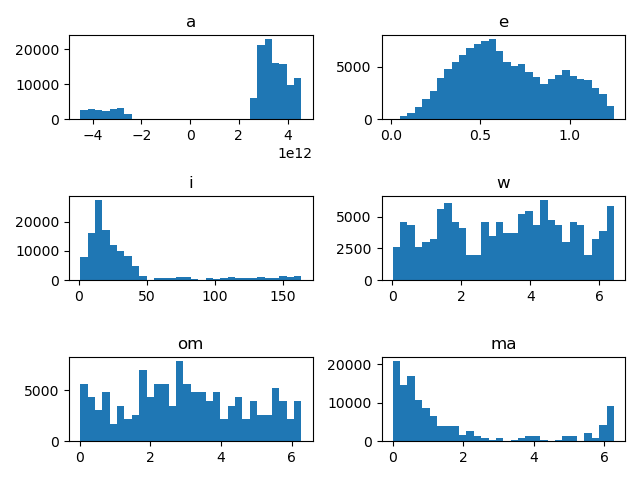

In [10]:
fig, ax = plt.subplots(nrows=3, ncols=2)
col_point=0
for row in ax:
    for col in row:
        col.hist(cloned_centaurs[cloned_centaurs.columns[col_point]], bins=30)
        col.set_title(cloned_centaurs.columns[col_point])
        col_point += 1
        
plt.tight_layout()

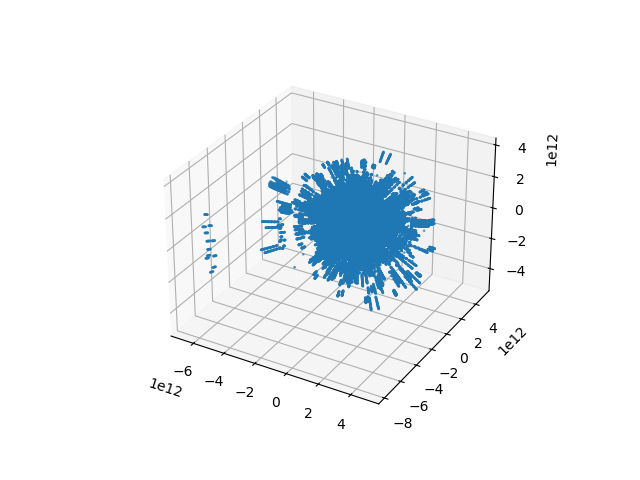

In [12]:
CartCentaurs = pd.read_csv("Data/CentaursCartesian.csv", index_col=0)
CartCentaurs.head

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(CartCentaurs['x'], CartCentaurs['y'], CartCentaurs['z'], s=1)

In [8]:
startPositionsAsteroids = pd.read_csv("Data/CentaursCartesian.csv", header=0, index_col=0)

In [11]:
startPositionsAsteroids.head

<bound method NDFrame.head of                 x             y             z            Vx            Vy  \
0   -9.198188e+11 -4.677037e+11  6.649661e+11    349.809100  -1107.474065   
1    2.247917e+12  1.442861e+12 -1.169936e+11  -3772.016473   3043.333107   
2   -1.217729e+12 -2.814734e+12 -1.039402e+12   3040.621932  -5383.118235   
3   -5.116365e+10  2.332616e+11 -1.967233e+11 -17166.859928  -2480.434259   
4   -1.593764e+12  2.386387e+12 -2.239876e+11   3472.335135   6627.997698   
..            ...           ...           ...           ...           ...   
899 -4.150288e+10  1.256054e+12  1.113762e+11 -10927.307035  -1751.101591   
900  2.681989e+11  1.525618e+10 -1.539452e+11  -3428.344188 -27158.573207   
901 -2.171181e+10 -3.692591e+11 -5.711134e+11 -11794.060001   8251.722115   
902 -5.540522e+11 -2.109008e+11 -2.704349e+11  -8573.762071  14045.375326   
903 -7.827660e+11 -4.078136e+11 -2.715647e+10  -6323.846256  12420.624417   

               Vz  
0     7745.497253  
1    